In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("voice-classification.csv")
data.head(2)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   

         kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0  274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1  634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  

[2 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
data = data.dropna()

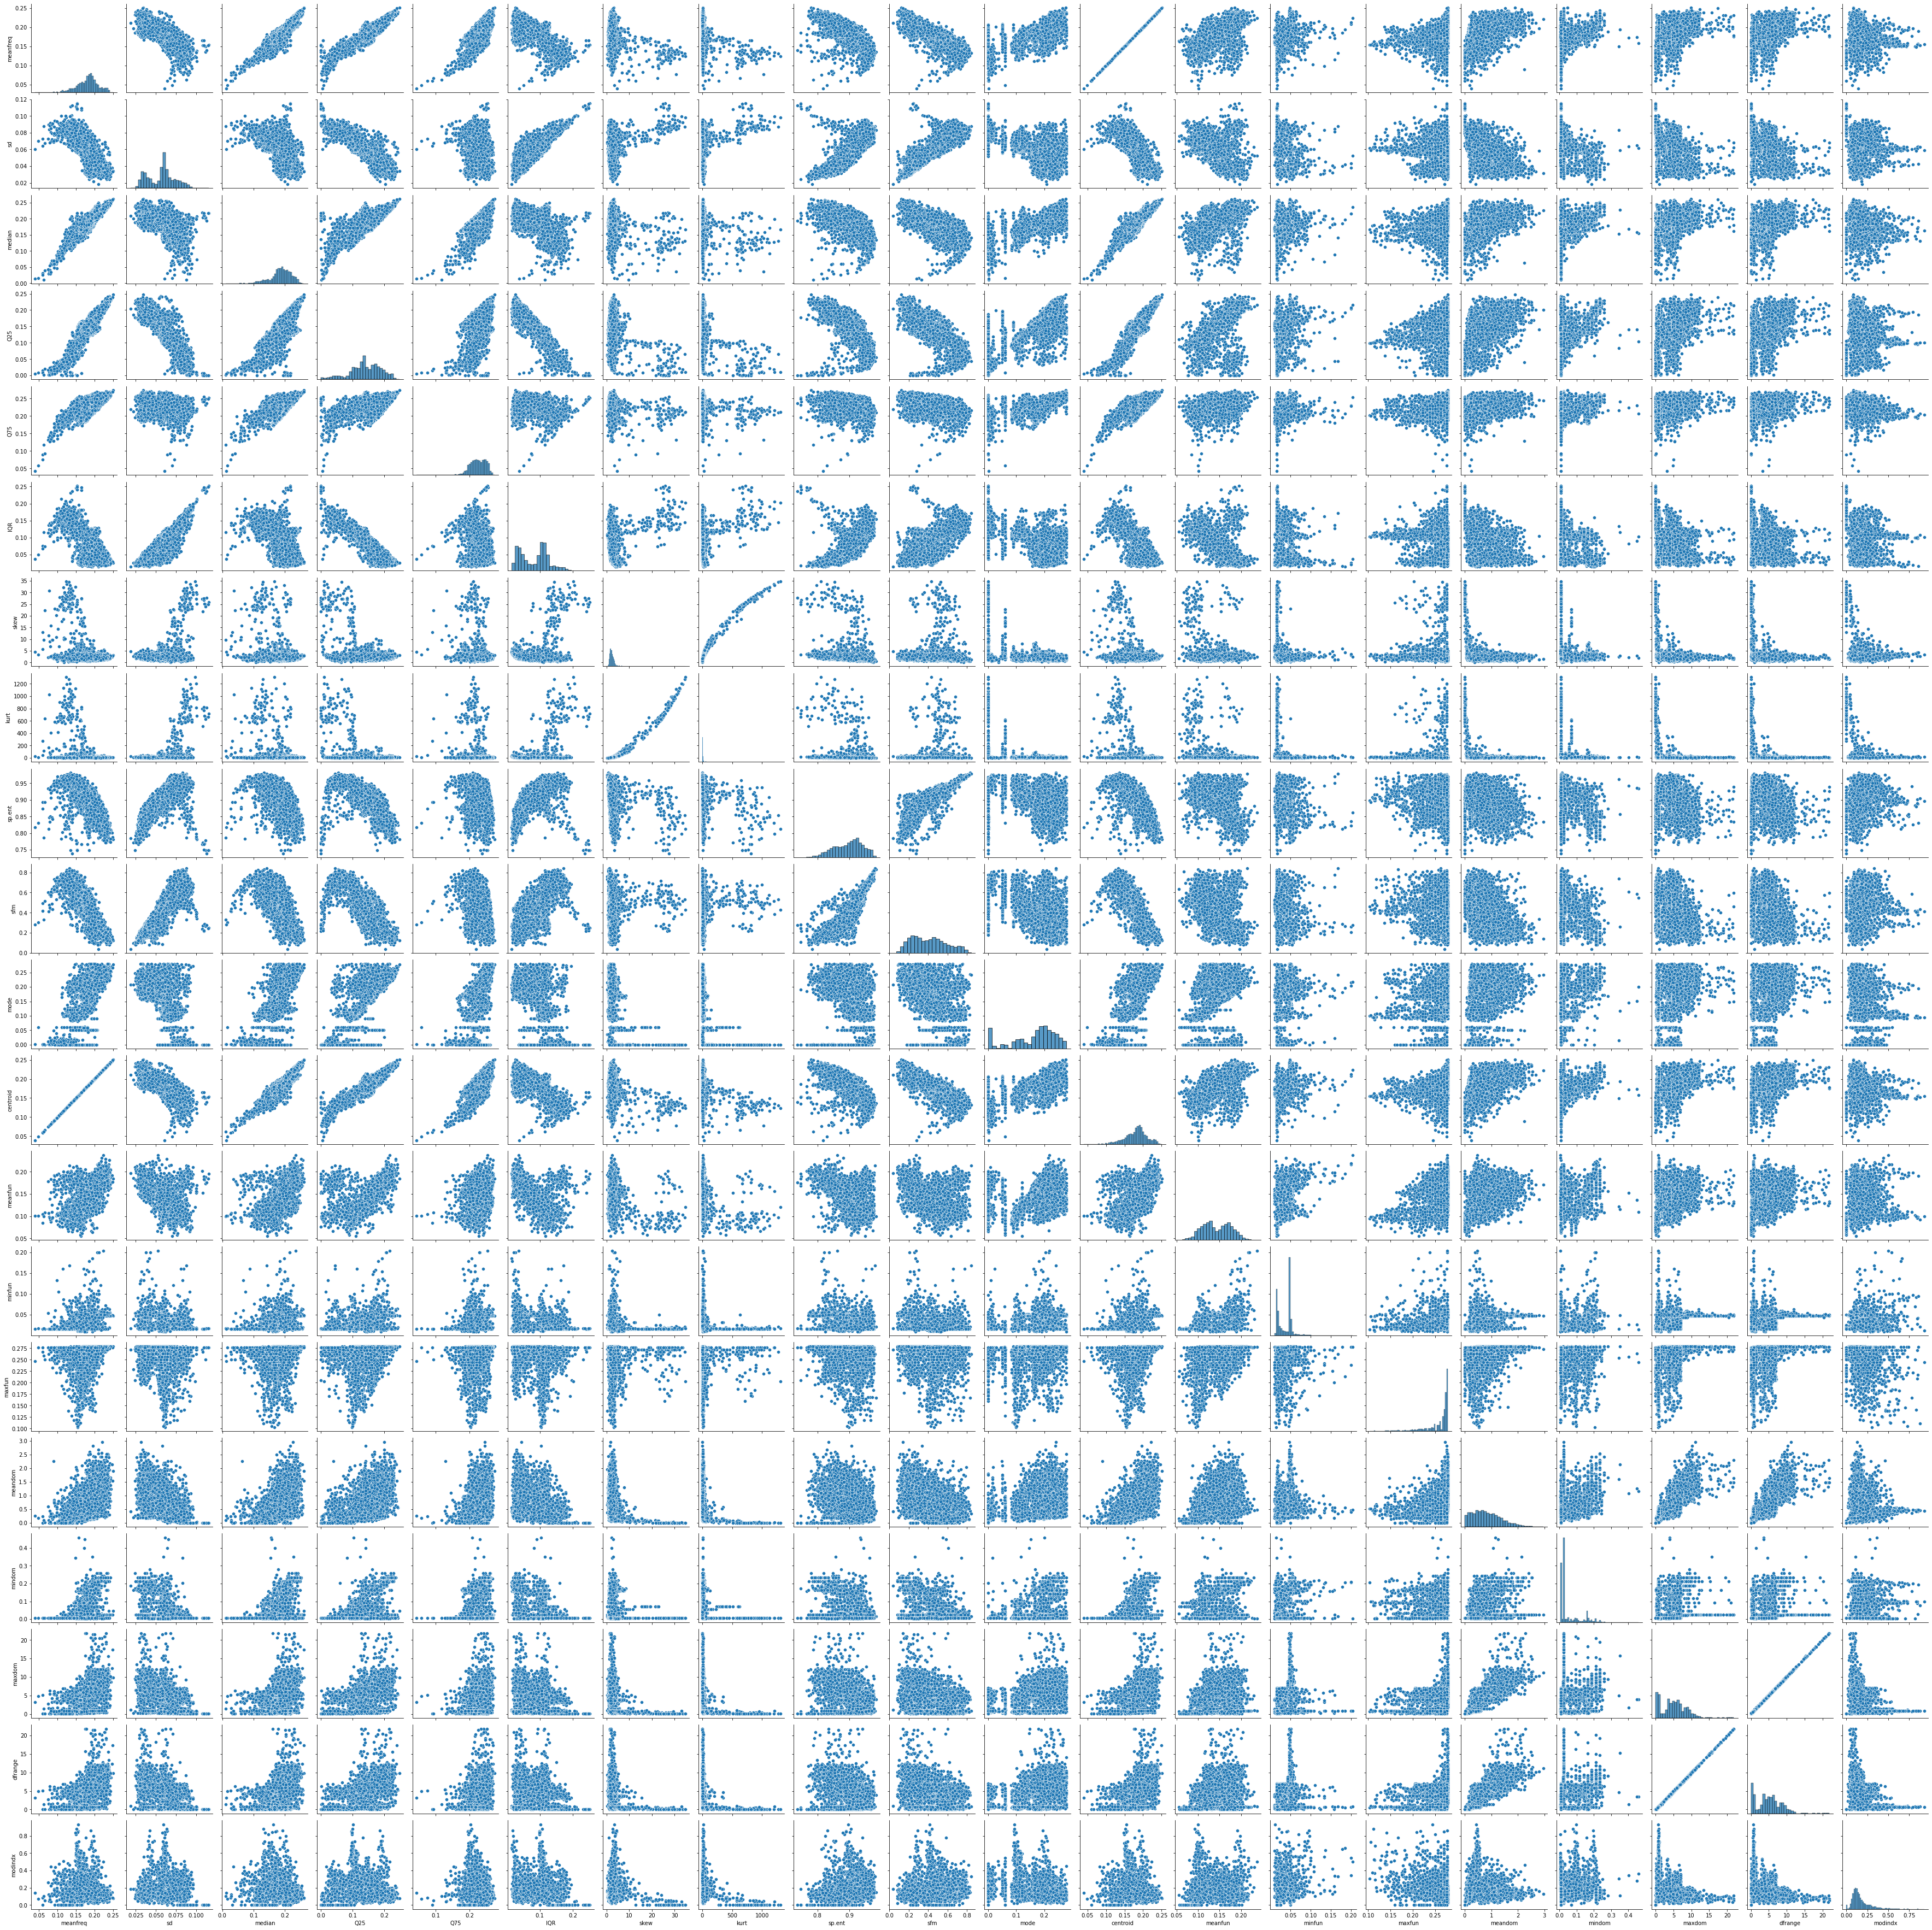

In [6]:
sns.pairplot(data=data)

In [7]:
x_data = data.drop(columns=["label"])
x_data.head(2)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   

         kurt    sp.ent       sfm  mode  centroid   meanfun    minfun  \
0  274.402906  0.893369  0.491918   0.0  0.059781  0.084279  0.015702   
1  634.613855  0.892193  0.513724   0.0  0.066009  0.107937  0.015826   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632

In [8]:
y_data = data['label']
y_data = y_data.map(lambda t: 0 if t=="female" else 1)
y_data.head(2)

0    1
1    1
Name: label, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=101)

In [10]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)

print("\nClassification Report: \n",classification_report(y_test,predictions))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,predictions))
print("\nAccuracy Score: ",str(round(accuracy_score(y_test,predictions),2)*100)+"%")


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       463
           1       0.96      0.95      0.96       488

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951


Confusion Matrix: 
 [[444  19]
 [ 23 465]]

Accuracy Score:  96.0%


In [11]:
forest = DecisionTreeClassifier()
forest.fit(X_train,y_train)

predictions = forest.predict(X_test)

print("\nClassification Report: \n",classification_report(y_test,predictions))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,predictions))
print("\nAccuracy Score: ",str(round(accuracy_score(y_test,predictions),2)*100)+"%")


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       463
           1       0.97      0.96      0.96       488

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951


Confusion Matrix: 
 [[447  16]
 [ 20 468]]

Accuracy Score:  96.0%


In [12]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

In [13]:
for name, model in classification_models:
  kfold = KFold(n_splits=10, random_state=(7), shuffle=(True))
  result = cross_val_score(model, x_data, y_data, cv=kfold, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 91.32% - SD Accuracy = 1.81%
K Nearest Neighbor: Mean Accuracy = 72.57% - SD Accuracy = 1.78%
Kernel SVM: Mean Accuracy = 67.49% - SD Accuracy = 2.88%
Naive Bayes: Mean Accuracy = 88.35% - SD Accuracy = 1.36%
Decision Tree: Mean Accuracy = 96.62% - SD Accuracy = 0.65%
Random Forest: Mean Accuracy = 97.98% - SD Accuracy = 0.59%


                                                -:END:-